In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows=1000

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_trans= pd.read_csv('/content/drive/My Drive/Colab Notebooks/cust_transaction_details (1).csv')
train_id= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Customer_DF (1).csv')

df_trans = train_trans[['customerEmail','transactionId','orderId','paymentMethodId','paymentMethodType','paymentMethodProvider','transactionAmount','transactionFailed']]

df_identity = train_id[['customerEmail','customerPhone','customerDevice','customerIPAddress','No_Transactions','No_Orders','No_Payments','Fraud']]

combined_df = pd.merge(df_trans,df_identity,how='outer',on='customerEmail')

set1 = ["transactionId","orderId","paymentMethodId","paymentMethodType","paymentMethodProvider"]
combined_df[set1] = combined_df[set1].replace({np.nan:'unknown'})
set2 = ["transactionAmount","transactionFailed"]
combined_df[set2] = combined_df[set2].replace({np.nan:-999})


# Task 1:- Exploratory Data Analysis of Datasets

In [0]:
train_id.shape

(168, 10)

In [0]:
train_id.describe

<bound method NDFrame.describe of      Unnamed: 0                        customerEmail  ... No_Payments  Fraud
0             0               josephhoward@yahoo.com  ...           1  False
1             1               evansjeffery@yahoo.com  ...           7   True
2             2            andersonwilliam@yahoo.com  ...           2  False
3             3                rubenjuarez@yahoo.com  ...           1  False
4             4                     uchen@malone.com  ...           6   True
5             5             robinsoncynthia@dunn.com  ...           2   True
6             6         samuel15@saunders-rhodes.com  ...           2   True
7             7                 johnlowery@gmail.com  ...           2   True
8             8            jameslandry@rodriguez.com  ...           1  False
9             9           ubranch@rivera-parker.info  ...           1   True
10           10               bowenwilliam@yahoo.com  ...           1   True
11           11                 ksummers@h

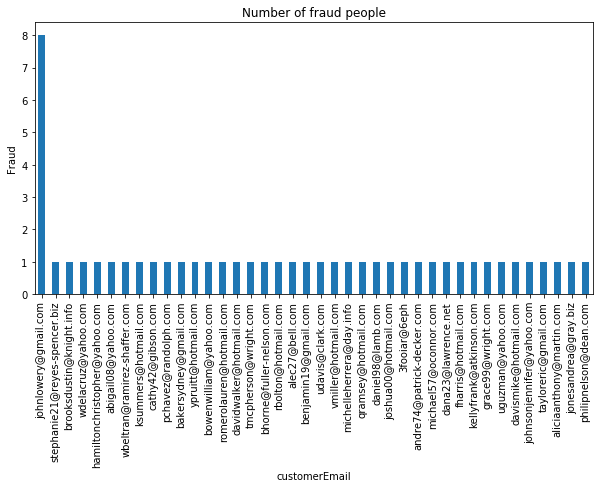

In [0]:
df_identity.customerEmail.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of fraud people")
plt.ylabel("Fraud")
plt.xlabel("customerEmail");

Preview of data:


,customerEmail,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,5,3,2,False



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
customerEmail        168 non-null object
customerPhone        168 non-null object
customerDevice       168 non-null object
customerIPAddress    168 non-null object
No_Transactions      168 non-null int64
No_Orders            168 non-null int64
No_Payments          168 non-null int64
Fraud                168 non-null bool
dtypes: bool(1), int64(3), object(4)
memory usage: 9.5+ KB
None

No duplicated entries found

To check: 
Unique count of non-numeric data

customerEmail        161
customerPhone        168
customerDevice       168
customerIPAddress    165
dtype: int64
Top 5 unique values of customerEmail
                   customerEmail  Count
0           johnlowery@gmail.com      8
1  stephanie21@reyes-spencer.biz      1
2       brooksdustin@knight.info      1
3            wdelacruz@yahoo.com      1
4

,count,mean,std,min,25%,50%,75%,max
No_Transactions,168.0,3.708333,2.801527,0.0,1.0,4.0,5.0,15.0
No_Orders,168.0,2.845238,1.981919,0.0,1.0,3.0,4.0,8.0
No_Payments,168.0,2.035714,2.113240,0.0,1.0,1.0,2.0,15.0


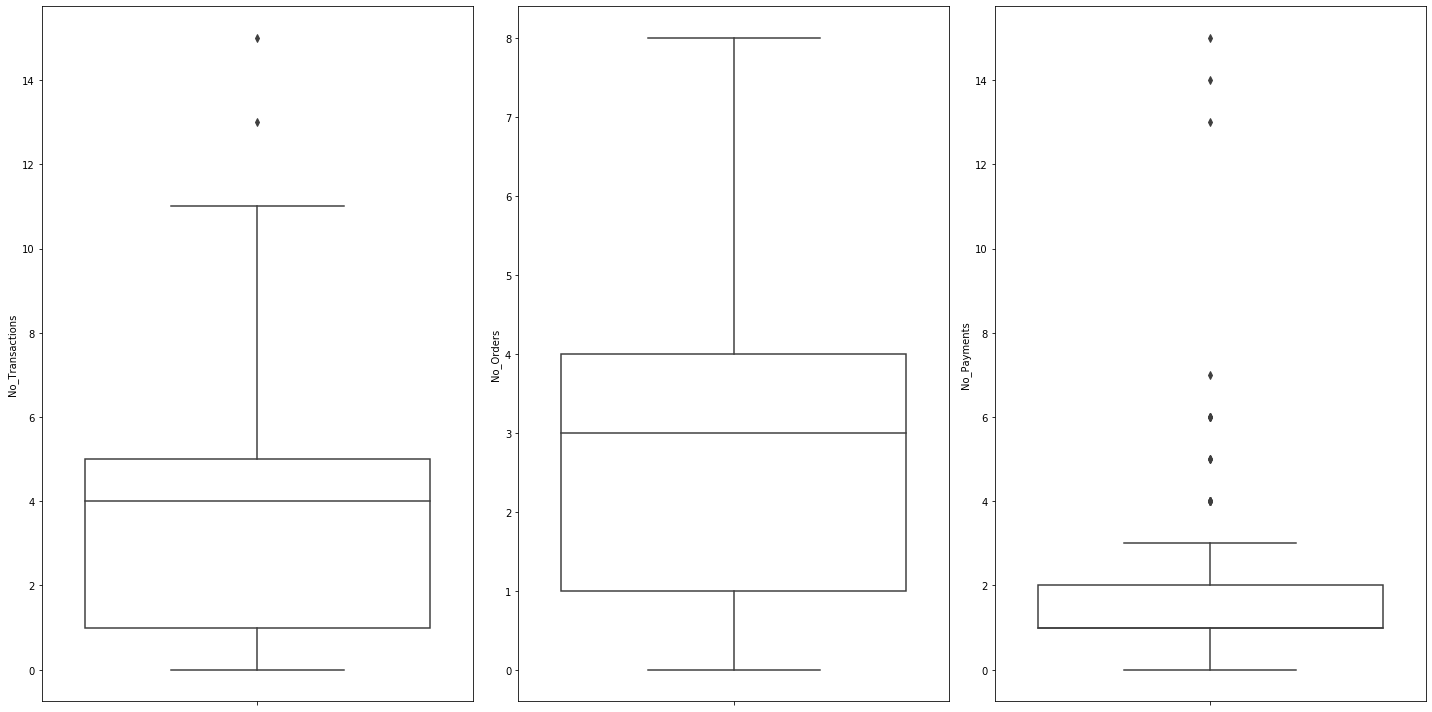


To check pairwise joint distribution of numeric data


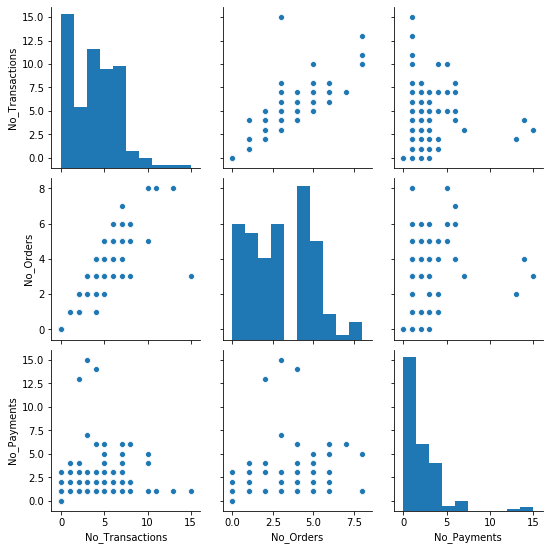


To check time series of numeric data  by daily, monthly and yearly frequency


In [0]:
def time_series_plot(df_identity):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df_identity.select_dtypes(include='datetime64').columns)>0:
        for col in df_identity.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df_identity.select_dtypes(include=np.number).columns:
                    __ = df_identity.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df_identity, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df_identity.describe().T)
    columns = df_identity.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df_identity, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df_identity.select_dtypes(include='category').columns) > 0:
        for col_num in df_identity.select_dtypes(include=np.number).columns:
            for col in df_identity.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df_identity, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df_identity.select_dtypes(include=np.number))
    else:
        sns.pairplot(df_identity.select_dtypes(include=np.number).join(df_identity[[hue]]), hue=hue)
    plt.show()


def top5(df_identity):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df_identity.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df_identity[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df_identity[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df_identity, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df_identity.select_dtypes(include=['object', 'category']).nunique())
    top5(df_identity)
    # Plot count distribution of categorical data
    for col in df_identity.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df_identity, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df_identity):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df_identity) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df_identity = df_identity.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df_identity.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df_identity.info())

    # generate preview of entries with null values
    if len(df_identity[df_identity.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df_identity[df_identity.isnull().any(axis=1)].head(3))
        missingno.matrix(df_identity)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df_identity[df_identity.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df_identity[df_identity.duplicated()]))
        display(df_identity[df_identity.duplicated(keep=False)].sort_values(by=list(df_identity.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df_identity)
    
    # EDA of numeric data
    numeric_eda(df_identity)
        
    # Plot time series plot of numeric data
    time_series_plot(df_identity)

eda(df_identity)

In [0]:
print('Size of data:',combined_df.size,combined_df.shape)
print('*'*70)
print('Null values:',combined_df.isna().sum())
print('*'*70)
print(combined_df.describe())
print('*'*70)
print('# of duplicated rows',combined_df.duplicated().sum())
print('*'*70)
combined_df.head()


Size of data: 12660 (844, 15)
**********************************************************************
Null values: customerEmail            0
transactionId            0
orderId                  0
paymentMethodId          0
paymentMethodType        0
paymentMethodProvider    0
transactionAmount        0
transactionFailed        0
customerPhone            0
customerDevice           0
customerIPAddress        0
No_Transactions          0
No_Orders                0
No_Payments              0
Fraud                    0
dtype: int64
**********************************************************************
       transactionAmount  transactionFailed  ...   No_Orders  No_Payments
count         844.000000         844.000000  ...  844.000000   844.000000
mean            4.515403         -29.342417  ...    3.695498     2.092417
std           176.495840         169.513889  ...    1.949159     1.853083
min          -999.000000        -999.000000  ...    0.000000     0.000000
25%            21.000000   

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,card,JCB 16 digit,18.0,0.0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,card,JCB 16 digit,26.0,0.0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,bitcoin,American Express,45.0,0.0,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,bitcoin,American Express,23.0,0.0,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,bitcoin,VISA 16 digit,43.0,1.0,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True


In [0]:
isFraud_True=combined_df[combined_df['Fraud'] == 1]
isFraud_False=combined_df.loc[combined_df['Fraud'] == 0]

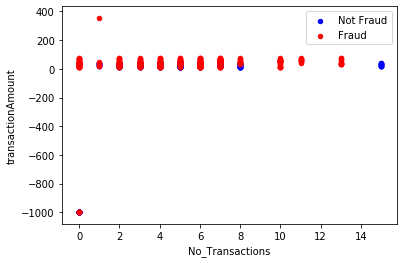

In [0]:
ax=isFraud_False.plot(kind='scatter',y='transactionAmount',x='No_Transactions',label='Not Fraud',color='blue')
isFraud_True.reset_index().plot(kind='scatter', y='transactionAmount', x='No_Transactions',
                                          color='red', label='Fraud', ax=ax)

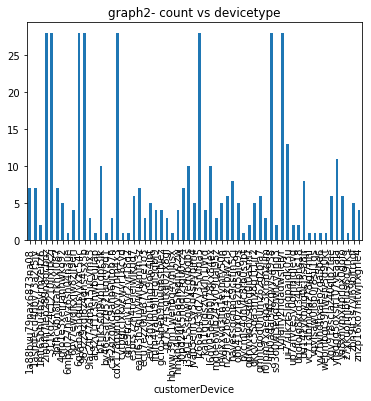

In [0]:
isFraud_True.groupby('customerDevice')['customerDevice'].count().plot(kind='bar',title='graph2- count vs devicetype')
plt.show()

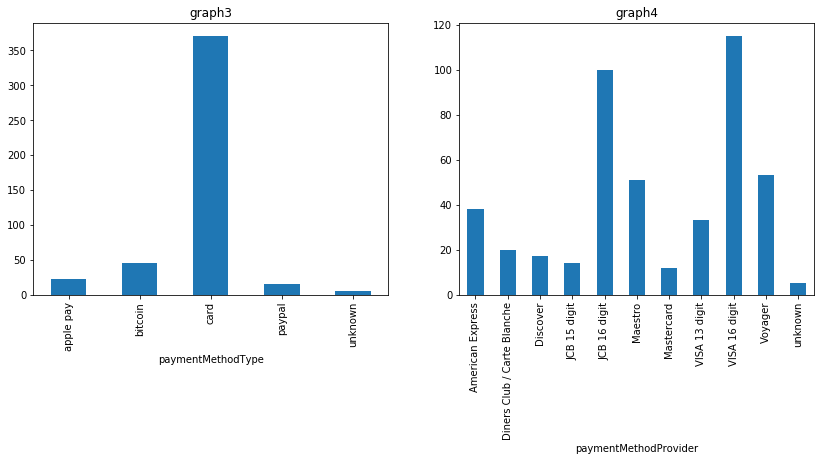

In [0]:
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
isFraud_True.groupby('paymentMethodType')['paymentMethodType'].count().plot(ax=ax1,kind='bar',title='graph3')
isFraud_True.groupby('paymentMethodProvider')['paymentMethodProvider'].count().plot(kind='bar',title='graph4')
plt.show()

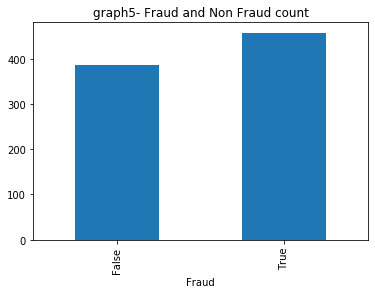

In [0]:
combined_df.groupby('Fraud')['Fraud'].count().plot(kind='bar',title='graph5- Fraud and Non Fraud count')
plt.show()

In [0]:
combined_df.groupby('paymentMethodType')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
paymentMethodType,,,,,,,,
apple pay,49.0,36.979592,13.454382,10.0,27.0,40.0,46.0,72.0
bitcoin,68.0,41.558824,19.860996,10.0,25.5,37.5,65.0,75.0
card,647.0,34.709428,20.304546,10.0,21.0,34.0,45.0,353.0
paypal,55.0,30.745455,13.562227,11.0,18.0,31.0,46.0,50.0
unknown,25.0,-999.000000,0.000000,-999.0,-999.0,-999.0,-999.0,-999.0


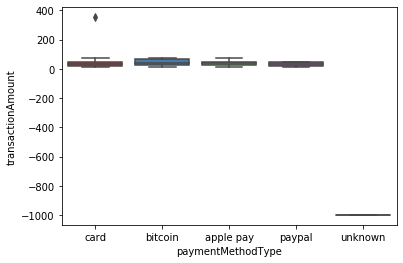

In [0]:
s = sns.boxplot( x="paymentMethodType", y="transactionAmount",data=combined_df, palette="Set1",showfliers=True)

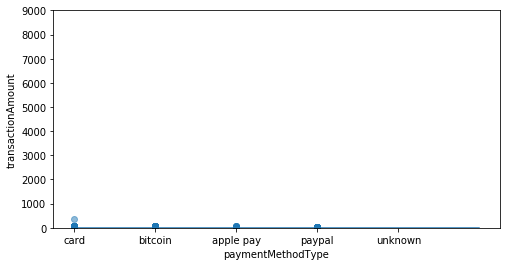

In [0]:
amt_mean=combined_df['transactionAmount'].mean()
x= combined_df['paymentMethodType']
y= combined_df['transactionAmount']
plt.figure(figsize=(8,4))
plt.scatter(x, y, alpha=0.5)
plt.plot([0, 5], [amt_mean, amt_mean])
plt.ylim(0, 9000)
plt.xlabel('paymentMethodType')
plt.ylabel('transactionAmount')
plt.show()

# Task 2:- Visualisations and Tabular Representations of Datasets

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
f1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Customer_DF (1).csv')
f2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/cust_transaction_details (1).csv')
f3 = pd.merge(f1,f2, on='customerEmail',how='outer',indicator=True)
f3 = f3.loc[:, ~f3.columns.str.contains('Unnamed')]

import random 
random.seed(35)
f3['Fraud']*=1
outcomes=f3['Fraud']
f4=f3.drop(['_merge','Fraud'],axis=1)
f4.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,a9lcj51r,vjbdvd,wt07xm68b,1.0,card,JCB 16 digit,18.0,0.0,pending
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,fulfilled
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,5mi94sfw,nlghpa,41ug157xz,0.0,bitcoin,American Express,45.0,0.0,fulfilled
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,br8ba1nu,uw0eeb,41ug157xz,0.0,bitcoin,American Express,23.0,0.0,fulfilled
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled


Text(0, 0.5, 'No_Transaction')

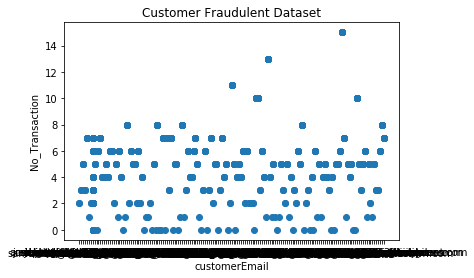

In [0]:
fig, ax = plt.subplots()

# scatter the customer's email id and no_transactions
ax.scatter(f3['customerEmail'],f3['No_Transactions'] )
# set a title and labels
ax.set_title('Customer Fraudulent Dataset')
ax.set_xlabel('customerEmail')
ax.set_ylabel('No_Transaction')

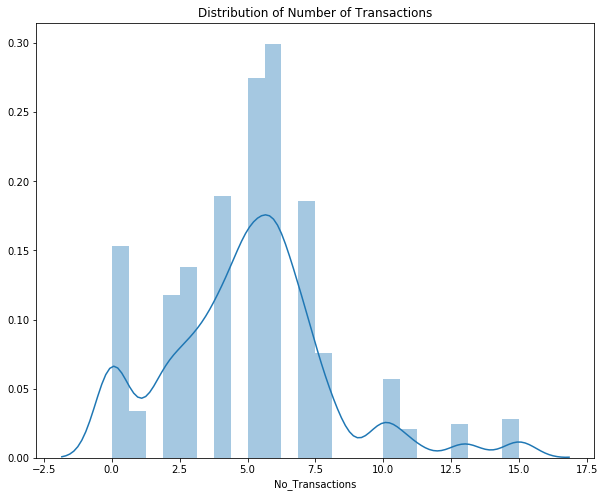

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Number of Transactions')
sns.distplot(f3.No_Transactions)

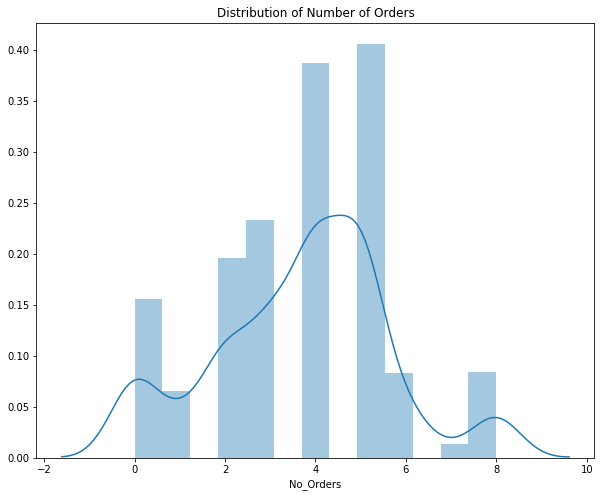

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Number of Orders')
sns.distplot(f3.No_Orders)

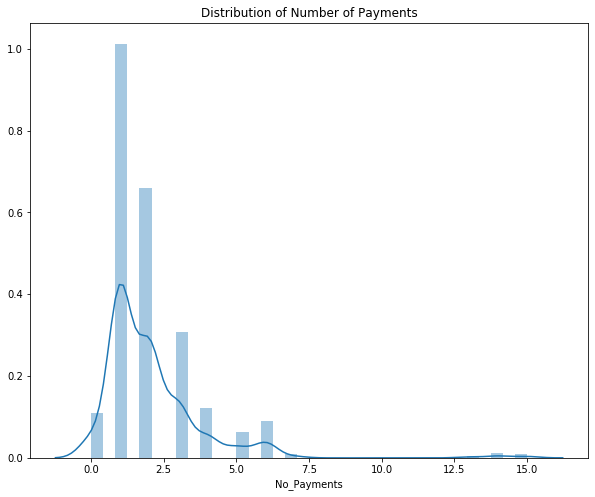

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Number of Payments')
sns.distplot(f3.No_Payments)

In [0]:
f3.paymentMethodProvider.unique()

array(['JCB 16 digit', 'American Express', 'VISA 16 digit', 'Discover',
       'Voyager', 'VISA 13 digit', 'Maestro', nan, 'Mastercard',
       'Diners Club / Carte Blanche', 'JCB 15 digit'], dtype=object)

In [0]:
f3.pivot_table(columns = ['paymentMethodProvider'],index = ['orderState'],values = ['transactionAmount'],aggfunc='mean')

transactionAmount  ...           
paymentMethodProvider  American Express  ...    Voyager
orderState                               ...           
failed                        33.650000  ...  30.076923
fulfilled                     30.139535  ...  39.617647
pending                       16.333333  ...  34.000000

[3 rows x 10 columns]

In [0]:
f3.paymentMethodType.unique()

array(['card', 'bitcoin', 'apple pay', 'paypal', nan], dtype=object)

In [0]:
f3.pivot_table(columns = ['paymentMethodType'],index = ['orderState'],values = ['transactionAmount'],aggfunc='mean')

transactionAmount                                 
paymentMethodType         apple pay    bitcoin       card     paypal
orderState                                                          
failed                    35.000000  39.692308  34.983871  32.800000
fulfilled                 38.756098  41.388889  34.718693  30.266667
pending                   20.750000  75.000000  34.058824  33.000000

Text(0, 0.5, 'Proportion of Customers')

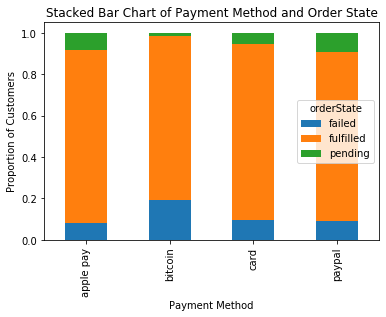

In [0]:
table=pd.crosstab(f3.paymentMethodType,f3.orderState)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Payment Method and Order State')
plt.xlabel('Payment Method')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'order state')

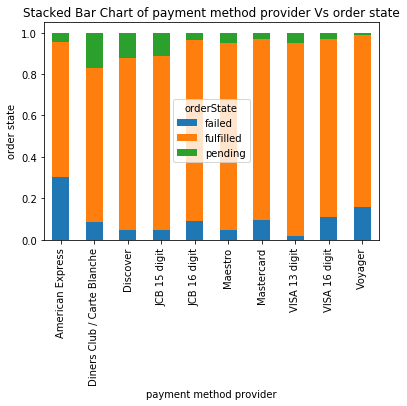

In [0]:
table=pd.crosstab(f3.paymentMethodProvider,f3.orderState)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of payment method provider Vs order state')
plt.xlabel('payment method provider')
plt.ylabel('order state')

Text(0, 0.5, 'frequency of transection status')

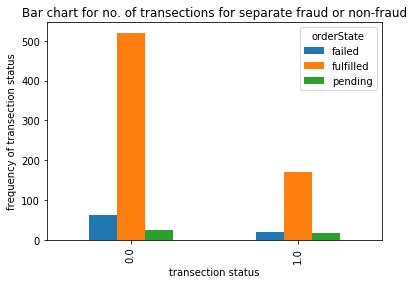

In [0]:
pd.crosstab(f3.transactionFailed,f3.orderState).plot(kind='bar')
plt.title('Bar chart for no. of transections for separate fraud or non-fraud')
plt.xlabel('transection status')
plt.ylabel('frequency of transection status')

Text(0, 0.5, 'frequency of each type of status')

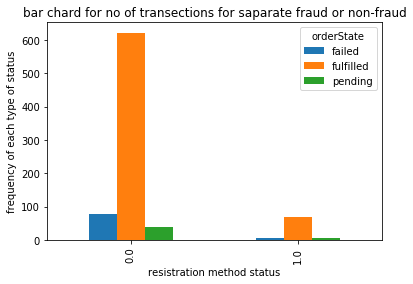

In [0]:
pd.crosstab(f3.paymentMethodRegistrationFailure,f3.orderState).plot(kind='bar')
plt.title('bar chard for no of transections for saparate fraud or non-fraud')
plt.xlabel('resistration method status')
plt.ylabel('frequency of each type of status')

In [0]:
works=f3.drop(['paymentMethodRegistrationFailure','transactionAmount','transactionFailed'],axis=1)
works.groupby('Fraud').mean()

,No_Transactions,No_Orders,No_Payments
Fraud,,,
0,5.119171,3.398964,1.769430
1,4.975983,3.945415,2.364629


In [0]:
s = works.groupby('No_Orders').Fraud.mean()
s

No_Orders
0    0.753086
1    0.323529
2    0.607843
3    0.280992
4    0.343284
5    0.601896
6    1.000000
7    1.000000
8    1.000000
Name: Fraud, dtype: float64

Text(0, 0.5, 'Frequency of fraud status')

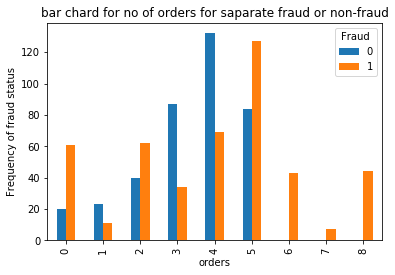

In [0]:
pd.crosstab(f3.No_Orders,f3.Fraud).plot(kind='bar')
plt.title('bar chard for no of orders for saparate fraud or non-fraud')
plt.xlabel('orders')
plt.ylabel('Frequency of fraud status')

In [0]:
works.groupby('No_Transactions').Fraud.mean()

No_Transactions
0     0.753086
1     0.388889
2     0.612903
3     0.630137
4     0.520000
5     0.241379
6     0.544304
7     0.642857
8     0.400000
10    1.000000
11    1.000000
13    1.000000
15    0.000000
Name: Fraud, dtype: float64

Text(0, 0.5, 'Frequency of order status')

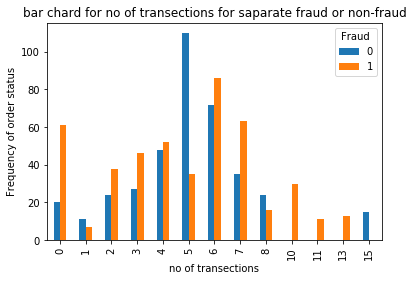

In [0]:
pd.crosstab(f3.No_Transactions,f3.Fraud).plot(kind='bar')
plt.title('bar chard for no of transections for saparate fraud or non-fraud')
plt.xlabel('no of transections')
plt.ylabel('Frequency of order status')

In [0]:
works.groupby('No_Payments').Fraud.mean()

No_Payments
0     0.717949
1     0.539326
2     0.426724
3     0.453704
4     0.558140
5     1.000000
6     1.000000
7     1.000000
13    1.000000
14    1.000000
15    1.000000
Name: Fraud, dtype: float64

Text(0, 0.5, 'Frequency of fraud (true/false)')

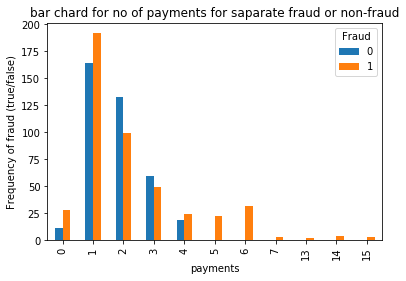

In [0]:
pd.crosstab(f3.No_Payments,f3.Fraud).plot(kind='bar')
plt.title('bar chard for no of payments for saparate fraud or non-fraud')
plt.xlabel('payments')
plt.ylabel('Frequency of fraud (true/false)')

In [0]:
f3_normal=f3.copy()

In [0]:
f3_normal['Fraud'] = pd.factorize(f3_normal['Fraud'])[0]
f3_normal['paymentMethodType'] = pd.factorize(f3_normal['paymentMethodType'])[0]
f3_normal['paymentMethodProvider'] = pd.factorize(f3_normal['paymentMethodProvider'])[0]
f3_normal['orderState'] = pd.factorize(f3_normal['orderState'])[0]
f3_normal

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,_merge
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,a9lcj51r,vjbdvd,wt07xm68b,1.0,0,0,18.0,0.0,0,both
1,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,y4wcv03i,yp6x27,wt07xm68b,1.0,0,0,26.0,0.0,1,both
2,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,5mi94sfw,nlghpa,41ug157xz,0.0,1,1,45.0,0.0,1,both
3,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,br8ba1nu,uw0eeb,41ug157xz,0.0,1,1,23.0,0.0,1,both
4,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,a33145ss,bn44oh,y3xp697jx,1.0,1,2,43.0,1.0,1,both
5,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,q3lyvbza,yk34y2,8pneoi03z,0.0,0,0,33.0,0.0,2,both
6,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,3alf9irw,28v6b0,8pneoi03z,0.0,0,0,24.0,1.0,1,both
7,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,69w9wymx,28v6b0,8pneoi03z,0.0,0,0,24.0,0.0,1,both
8,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,pegqc4ud,itnk8y,dluy3jka0,0.0,0,3,25.0,1.0,1,both
9,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,uo3slwh7,itnk8y,8pneoi03z,0.0,0,0,25.0,0.0,1,both


In [0]:
f3_normal['No_Transactions']=(f3_normal['No_Transactions']-f3_normal['No_Transactions'].min())/(f3_normal['No_Transactions'].max()-f3_normal['No_Transactions'].min())
f3_normal['No_Orders']=(f3_normal['No_Orders']-f3_normal['No_Orders'].min())/(f3_normal['No_Orders'].max()-f3_normal['No_Orders'].min())
f3_normal['No_Payments']=(f3_normal['No_Payments']-f3_normal['No_Payments'].min())/(f3_normal['No_Payments'].max()-f3_normal['No_Payments'].min())
f3_normal['transactionAmount']=(f3_normal['transactionAmount']-f3_normal['transactionAmount'].min())/(f3_normal['transactionAmount'].max()-f3_normal['transactionAmount'].min())

In [0]:
f3_normal=f3_normal.drop(['customerEmail'],axis=1)

In [0]:
work=f3_normal.drop(['paymentMethodRegistrationFailure'],axis=1)
variables =['paymentMethodType','paymentMethodProvider','orderState']
for var in variables:
    dummies = pd.get_dummies(f3_normal[var], prefix=var)
    work=work.join(dummies)
work

,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,_merge,paymentMethodType_-1,paymentMethodType_0,paymentMethodType_1,paymentMethodType_2,paymentMethodType_3,paymentMethodProvider_-1,paymentMethodProvider_0,paymentMethodProvider_1,paymentMethodProvider_2,paymentMethodProvider_3,paymentMethodProvider_4,paymentMethodProvider_5,paymentMethodProvider_6,paymentMethodProvider_7,paymentMethodProvider_8,paymentMethodProvider_9,orderState_-1,orderState_0,orderState_1,orderState_2
0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",0.133333,0.250,0.066667,0,a9lcj51r,vjbdvd,wt07xm68b,0,0,0.023324,0.0,0,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",0.133333,0.250,0.066667,0,y4wcv03i,yp6x27,wt07xm68b,0,0,0.046647,0.0,1,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,0.200000,0.375,0.466667,1,5mi94sfw,nlghpa,41ug157xz,1,1,0.102041,0.0,1,both,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,0.200000,0.375,0.466667,1,br8ba1nu,uw0eeb,41ug157xz,1,1,0.037901,0.0,1,both,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,0.200000,0.375,0.466667,1,a33145ss,bn44oh,y3xp697jx,1,2,0.096210,1.0,1,both,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,q3lyvbza,yk34y2,8pneoi03z,0,0,0.067055,0.0,2,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,3alf9irw,28v6b0,8pneoi03z,0,0,0.040816,1.0,1,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
7,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,69w9wymx,28v6b0,8pneoi03z,0,0,0.040816,0.0,1,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,pegqc4ud,itnk8y,dluy3jka0,0,3,0.043732,1.0,1,both,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,uo3slwh7,itnk8y,8pneoi03z,0,0,0.043732,0.0,1,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [0]:
work=work.drop(variables,axis = 1)
work

,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed,_merge,paymentMethodType_-1,paymentMethodType_0,paymentMethodType_1,paymentMethodType_2,paymentMethodType_3,paymentMethodProvider_-1,paymentMethodProvider_0,paymentMethodProvider_1,paymentMethodProvider_2,paymentMethodProvider_3,paymentMethodProvider_4,paymentMethodProvider_5,paymentMethodProvider_6,paymentMethodProvider_7,paymentMethodProvider_8,paymentMethodProvider_9,orderState_-1,orderState_0,orderState_1,orderState_2
0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",0.133333,0.250,0.066667,0,a9lcj51r,vjbdvd,wt07xm68b,0.023324,0.0,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",0.133333,0.250,0.066667,0,y4wcv03i,yp6x27,wt07xm68b,0.046647,0.0,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,0.200000,0.375,0.466667,1,5mi94sfw,nlghpa,41ug157xz,0.102041,0.0,both,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,0.200000,0.375,0.466667,1,br8ba1nu,uw0eeb,41ug157xz,0.037901,0.0,both,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,0.200000,0.375,0.466667,1,a33145ss,bn44oh,y3xp697jx,0.096210,1.0,both,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,q3lyvbza,yk34y2,8pneoi03z,0.067055,0.0,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,3alf9irw,28v6b0,8pneoi03z,0.040816,1.0,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
7,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,69w9wymx,28v6b0,8pneoi03z,0.040816,0.0,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,pegqc4ud,itnk8y,dluy3jka0,0.043732,1.0,both,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",0.333333,0.375,0.133333,0,uo3slwh7,itnk8y,8pneoi03z,0.043732,0.0,both,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


# Task 3:- Significant and insignificant factors in contributing to fraud
**Significant Factors**

Customer Email, Transaction Id, Payment Method Id, Payment Method Registration Failure, Payment Method Type, Payment Method Provider, Transaction Amount, Transaction Failed, Customer Device, No_Transactions, No_Orders, No_Payments, Fraud

**Insignificant Factors**

Customer Phone, Customer IP Address, Order State, Customer Billing Address, Order Id

# Task 4:- Prediction Model to Predict if a Customer is Fraudulent based on their Profile

In [0]:
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [0]:
train_trans= pd.read_csv('/content/drive/My Drive/Colab Notebooks/cust_transaction_details (1).csv')
train_id= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Customer_DF (1).csv')

final_df = pd.merge(train_trans,train_id,how='outer',on='customerEmail')

print('Size of data:',final_df.size,final_df.shape)
print('*'*70)
print('Null values:',final_df.isna().sum())
print('*'*70)
print(final_df.describe())
print('*'*70)
print('# of duplicated rows',final_df.duplicated().sum())
print('*'*70)
final_df.head()

Size of data: 16880 (844, 20)
**********************************************************************
Null values: Unnamed: 0_x                        25
customerEmail                        0
transactionId                       25
orderId                             25
paymentMethodId                     25
paymentMethodRegistrationFailure    25
paymentMethodType                   25
paymentMethodProvider               25
transactionAmount                   25
transactionFailed                   25
orderState                          25
Unnamed: 0_y                         0
customerPhone                        0
customerDevice                       0
customerIPAddress                    0
customerBillingAddress               0
No_Transactions                      0
No_Orders                            0
No_Payments                          0
Fraud                                0
dtype: int64
**********************************************************************
       Unnamed: 0_x  p

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0.0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1.0,card,JCB 16 digit,18.0,0.0,pending,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1.0,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,fulfilled,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
2,2.0,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0.0,bitcoin,American Express,45.0,0.0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
3,3.0,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0.0,bitcoin,American Express,23.0,0.0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
4,4.0,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True


In [0]:
cols = ['customerEmail','transactionId','orderId','paymentMethodId','paymentMethodRegistrationFailure','paymentMethodType','paymentMethodProvider','transactionAmount','transactionFailed','orderState','customerDevice',
                 'customerBillingAddress','No_Transactions','No_Orders','No_Payments','Fraud']

final_df=final_df.filter(cols)

In [0]:
print('Null values:',final_df.isna().sum())

Null values: customerEmail                        0
transactionId                       25
orderId                             25
paymentMethodId                     25
paymentMethodRegistrationFailure    25
paymentMethodType                   25
paymentMethodProvider               25
transactionAmount                   25
transactionFailed                   25
orderState                          25
customerDevice                       0
customerBillingAddress               0
No_Transactions                      0
No_Orders                            0
No_Payments                          0
Fraud                                0
dtype: int64


In [0]:
numeric_cols=['paymentMethodRegistrationFailure','transactionAmount','transactionFailed','No_Transactions','No_Orders','No_Payments']

In [0]:
for x in numeric_cols:
 final_df[x].fillna((final_df[x].mean()), inplace=True)

In [0]:
str_cols=['customerEmail','transactionId','orderId','paymentMethodId','paymentMethodType','paymentMethodProvider','orderState','customerDevice','customerBillingAddress','Fraud']

In [0]:
for x in str_cols:
 final_df[x].fillna("no record", inplace=True)

In [0]:
fin_cols = ['customerEmail','transactionId','orderId','paymentMethodId','paymentMethodRegistrationFailure','paymentMethodType','paymentMethodProvider','transactionAmount','transactionFailed','orderState','customerDevice',
                 'customerBillingAddress','No_Transactions','No_Orders','No_Payments','Fraud']

enc = ['customerEmail','transactionId','orderId','paymentMethodId','paymentMethodRegistrationFailure','paymentMethodType','paymentMethodProvider','transactionAmount','transactionFailed','orderState','customerDevice',
                 'customerBillingAddress','No_Transactions','No_Orders','No_Payments','Fraud']


In [0]:
for x in enc:
 labelenc = LabelEncoder()
 final_df[x] = labelenc.fit_transform(final_df[x].astype('str'))

In [0]:
y=final_df.Fraud.copy()
X=final_df.drop('Fraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confmatrix)

[[79  0]
 [ 2 88]]


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

pr1 = classifier.predict(X_test)


Accuracy: 0.9881656804733728


# Task 5:- Report on the models success and most important Features

Training dataset for transaction and identity are merged to form final dataframe. This data frame is filtered out by only considering few columns which would be relevant for prediction. Here the most significant columns or factors are **Customer Email, Payment Method Type, Payment Method Provider, Transaction amount**. After this the dataset is cleaned by replacing NANs with appropriate values in numerical as well object columns. Label encoders are used for all the columns. Test data is also cleaned and irrelevant columns are removed. Random forest classifier is used to predict the isFraud for test dataset. **Accuracy of the model is 0.98**